<a href="https://colab.research.google.com/github/OfriA/AppliedProject52056/blob/main/data/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/AppliedProject/data/ER_data.xlsx'
data = pd.read_excel(path)
data.head()


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,pba17,pba18,pba19,pba20,pba21,pba22,pba23,publication,publication_1_TEXT,notes
0,2023-11-10 05:03:59,2023-11-10 05:18:24,0,77.137.72.8,100,864,1,2023-11-10 05:18:24.970,R_2zx6JDdyuRWIFe7,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
1,2023-11-11 11:48:18,2023-11-11 12:05:28,0,89.139.151.60,100,1030,1,2023-11-11 12:05:29.243,R_87VewwKW25MdOWR,NaN,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN,NaN,אספקט נוסף שתורם ללחץ משפחתי או כך שאנו מארחים...
2,2023-11-11 12:15:06,2023-11-11 12:28:18,0,77.137.65.231,100,791,1,2023-11-11 12:28:18.984,R_2UXkBlYFVZKykUc,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,לא
3,2023-11-11 12:32:33,2023-11-11 12:59:45,0,2.52.150.227,100,1631,1,2023-11-11 12:59:45.938,R_3NJoeQvJTS5YS4s,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
4,2023-11-11 13:21:15,2023-11-11 13:51:44,0,77.137.77.167,100,1829,1,2023-11-11 13:51:45.899,R_2wHVGst8nWwQV1c,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [6]:
print(data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'pba17', 'pba18', 'pba19', 'pba20', 'pba21', 'pba22', 'pba23',
       'publication', 'publication_1_TEXT', 'notes'],
      dtype='object', length=344)


In [7]:
import matplotlib.pyplot as plt


In [8]:
CBCL_features = data.columns[240:283].to_list()
self_exposure_features = ['SelfExposure_1', 'SelfExposure_2', 'SelfExposure_3', 'SelfExposure_4', 'SelfExposure_5', 'SelfExposure_6']
other_exposure_features = ['OtherExposure_6', 'OtherExposure_7', 'OtherExposure_8', 'OtherExposure_9', 'OtherExposure_10', 'OtherExposure_11', 'OtherExposure_12']

In [9]:
data.shape

(659, 344)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Columns: 344 entries, StartDate to notes
dtypes: datetime64[ns](3), float64(299), int64(13), object(29)
memory usage: 1.7+ MB


In [11]:
self_exposure_features = ['SelfExposure_1', 'SelfExposure_2', 'SelfExposure_3', 'SelfExposure_4', 'SelfExposure_5', 'SelfExposure_6']
other_exposure_features = ['OtherExposure_6', 'OtherExposure_7', 'OtherExposure_8', 'OtherExposure_9', 'OtherExposure_10', 'OtherExposure_11', 'OtherExposure_12']

data['self_exposure_score'] = np.sum(data[self_exposure_features], axis=1)
data['other_exposure_score'] = np.sum(data[other_exposure_features], axis=1)
data['war_exposure_score'] = np.sum(data[['self_exposure_score', 'other_exposure_score']], axis=1)

In [25]:

CBCL_D_features = CBCL_features[0:13]
CBCL_A_features = CBCL_features[13:31]
CBCL_S_features = CBCL_features[31:]


data['CBCL_D_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_A_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_S_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_score'] = np.sum(data[['CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score']], axis=1)

/tmp/ipython-input-621276567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CBCL_D_score'] = np.sum(data[CBCL_D_features], axis=1)
/tmp/ipython-input-621276567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CBCL_A_score'] = np.sum(data[CBCL_D_features], axis=1)
/tmp/ipython-input-621276567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [13]:
print(f"CBCL mean: {data['CBCL_score'].mean():.5}, CBCL SD: {data['CBCL_score'].std():.5}")

CBCL mean: 10.803, CBCL SD: 14.79


In [116]:
data

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,pba23,publication,publication_1_TEXT,notes,self_exposure_score,other_exposure_score,CBCL_D_score,CBCL_A_score,CBCL_S_score,CBCL_total_score
0,2023-11-10 05:03:59,2023-11-10 05:18:24,0,77.137.72.8,100,864,1,2023-11-10 05:18:24.970,R_2zx6JDdyuRWIFe7,NaN,...,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-11-11 11:48:18,2023-11-11 12:05:28,0,89.139.151.60,100,1030,1,2023-11-11 12:05:29.243,R_87VewwKW25MdOWR,NaN,...,0.0,NaN,NaN,אספקט נוסף שתורם ללחץ משפחתי או כך שאנו מארחים...,0.0,2.0,4.0,4.0,4.0,12.0
3,2023-11-11 12:32:33,2023-11-11 12:59:45,0,2.52.150.227,100,1631,1,2023-11-11 12:59:45.938,R_3NJoeQvJTS5YS4s,NaN,...,0.0,NaN,NaN,NaN,0.0,1.0,3.0,3.0,3.0,9.0
4,2023-11-11 13:21:15,2023-11-11 13:51:44,0,77.137.77.167,100,1829,1,2023-11-11 13:51:45.899,R_2wHVGst8nWwQV1c,NaN,...,0.0,NaN,NaN,NaN,1.0,6.0,10.0,10.0,10.0,30.0
7,2023-11-11 23:56:33,2023-11-12 00:59:58,0,147.235.192.79,100,3804,1,2023-11-12 00:59:59.035,R_d6zfhIHK3IYVS1P,NaN,...,0.0,NaN,NaN,NaN,1.0,2.0,7.0,7.0,7.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,2023-11-26 08:18:01,2023-11-26 08:53:53,0,82.166.239.204,97,2152,0,2023-12-03 08:53:54.798,R_2ztDsN9VdHpVO0P,NaN,...,2.0,2.0,NaN,NaN,1.0,3.0,19.0,19.0,19.0,57.0
652,2023-11-26 13:45:31,2023-11-26 14:09:11,0,147.235.195.148,97,1420,0,2023-12-03 14:09:13.097,R_1IXEcEjtMY8gRN5,NaN,...,0.0,2.0,NaN,עם ישראל חי תמיד! יש בנו אהבה והיא תנצח,0.0,0.0,0.0,0.0,0.0,0.0
653,2023-11-26 07:29:16,2023-11-26 20:34:31,0,147.235.214.180,97,47115,0,2023-12-03 20:34:33.728,R_3qE7OWwdZ4A3ULC,NaN,...,0.0,1.0,NaN,NaN,0.0,1.0,18.0,18.0,18.0,54.0
654,2023-11-26 22:02:41,2023-11-26 22:13:08,0,31.168.96.254,97,627,0,2023-12-03 22:13:11.524,R_21cuNVR5ybguwd6,NaN,...,1.0,2.0,NaN,NaN,1.0,0.0,7.0,7.0,7.0,21.0


In [15]:
data['Event_length'] = data['Event'].str.len()
data['EER_text_length'] = data['EER_text'].str.len()

In [16]:
data = data[np.sum(data[self_exposure_features + other_exposure_features + CBCL_features + ['Event_length', 'EER_text_length']].isna(), axis=1) == 0]

(array([37., 24., 50., 19., 38., 18., 24., 13., 24.,  6.,  6.,  2.,  4.,
         1.,  4.]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ,
        48.4, 52.8, 57.2, 61.6, 66. ]),
 <BarContainer object of 15 artists>)

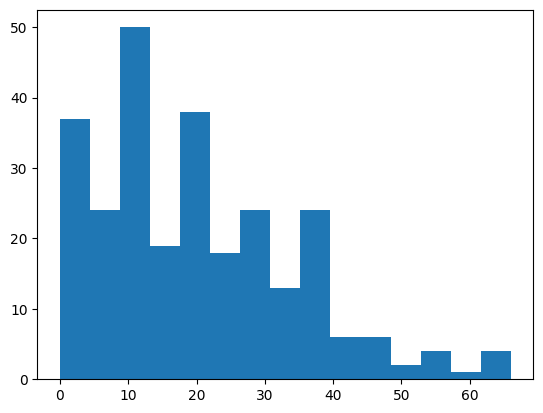

In [17]:
plt.hist(data['CBCL_score'], bins=15)

In [18]:
!pip install corner

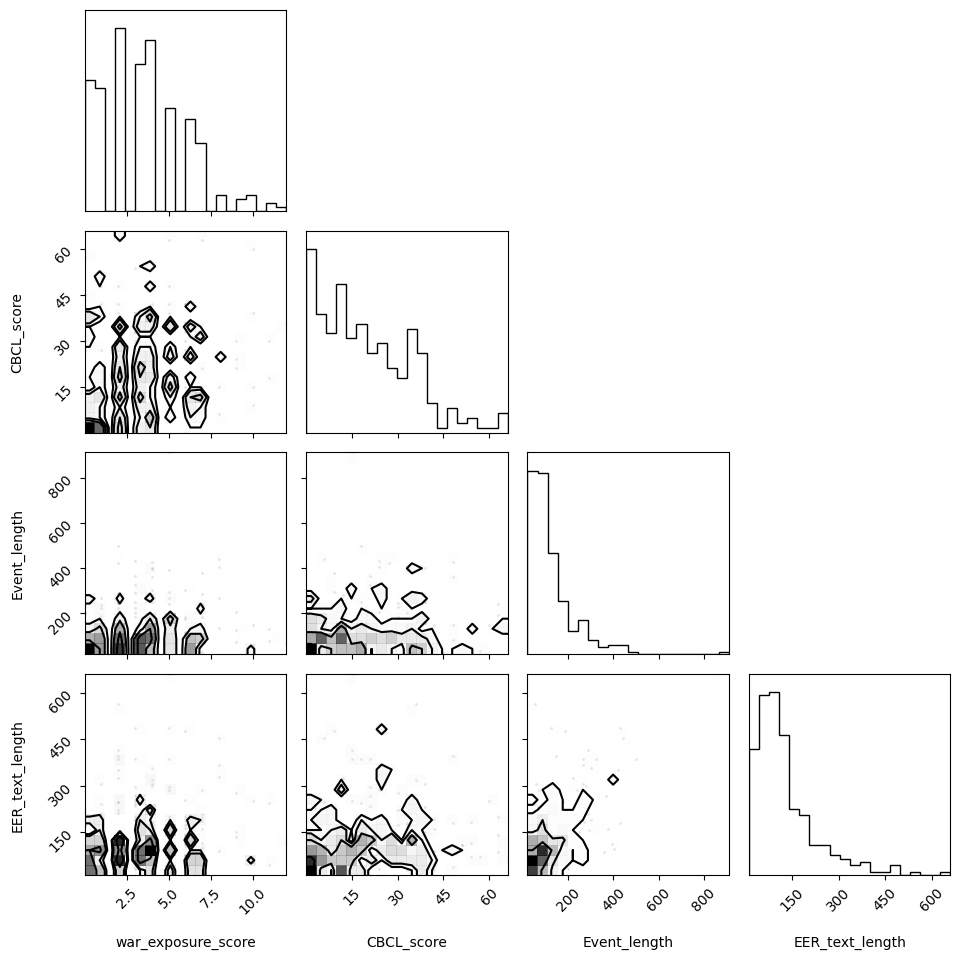

In [19]:
import corner


# Generate corner plot using ArviZ
labels = data[['war_exposure_score', 'CBCL_score', 'Event_length', 'EER_text_length']].columns.tolist()  # Get column names as labels
figure = corner.corner(data[['war_exposure_score', 'CBCL_score', 'Event_length', 'EER_text_length']].values, labels=labels, quiet = True)
plt.tight_layout()
plt.show()

In [20]:
import seaborn as sns

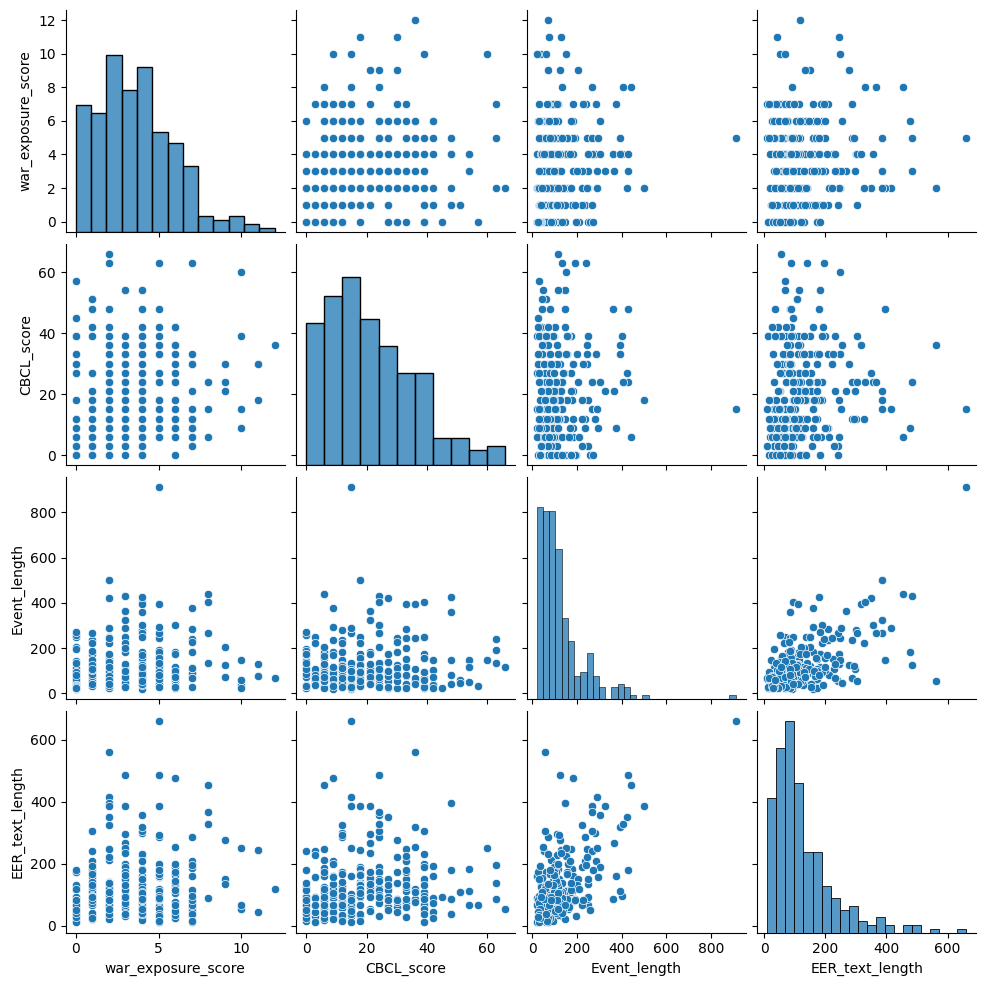

In [21]:
sns.pairplot(data[['war_exposure_score', 'CBCL_score', 'Event_length', 'EER_text_length']])

In [22]:
data['self_exposure_avg'] = np.mean(data[self_exposure_features], axis=1)
data['other_exposure_avg'] = np.mean(data[other_exposure_features], axis=1)
data['war_exposure_avg'] = np.mean(data[self_exposure_features + other_exposure_features], axis=1)

/tmp/ipython-input-2211915379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['self_exposure_avg'] = np.mean(data[self_exposure_features], axis=1)
/tmp/ipython-input-2211915379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['other_exposure_avg'] = np.mean(data[other_exposure_features], axis=1)
/tmp/ipython-input-2211915379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [26]:
data['CBCL_D_avg'] = np.mean(data[CBCL_D_features], axis=1)
data['CBCL_A_avg'] = np.mean(data[CBCL_D_features], axis=1)
data['CBCL_S_avg'] = np.mean(data[CBCL_D_features], axis=1)
data['CBCL_avg'] = np.mean(data[CBCL_features], axis=1)

/tmp/ipython-input-2745468518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CBCL_D_avg'] = np.mean(data[CBCL_D_features], axis=1)
/tmp/ipython-input-2745468518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CBCL_A_avg'] = np.mean(data[CBCL_D_features], axis=1)
/tmp/ipython-input-2745468518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [24]:
data

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,CBCL_S_score,CBCL_score,Event_length,EER_text_length,self_exposure_avg,other_exposure_avg,war_exposure_avg,CBCL_D_avg,CBCL_A_avg,CBCL_S_avg
0,2023-11-10 05:03:59,2023-11-10 05:18:24,0,77.137.72.8,100,864,1,2023-11-10 05:18:24.970,R_2zx6JDdyuRWIFe7,NaN,...,0.0,0.000000,103,116.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-11-11 11:48:18,2023-11-11 12:05:28,0,89.139.151.60,100,1030,1,2023-11-11 12:05:29.243,R_87VewwKW25MdOWR,NaN,...,4.0,0.093023,117,76.0,0.000000,0.285714,0.153846,0.307692,0.307692,0.307692
3,2023-11-11 12:32:33,2023-11-11 12:59:45,0,2.52.150.227,100,1631,1,2023-11-11 12:59:45.938,R_3NJoeQvJTS5YS4s,NaN,...,3.0,0.325581,70,67.0,0.000000,0.142857,0.076923,0.230769,0.230769,0.230769
4,2023-11-11 13:21:15,2023-11-11 13:51:44,0,77.137.77.167,100,1829,1,2023-11-11 13:51:45.899,R_2wHVGst8nWwQV1c,NaN,...,10.0,0.767442,88,59.0,0.166667,0.857143,0.538462,0.769231,0.769231,0.769231
7,2023-11-11 23:56:33,2023-11-12 00:59:58,0,147.235.192.79,100,3804,1,2023-11-12 00:59:59.035,R_d6zfhIHK3IYVS1P,NaN,...,7.0,0.302326,325,385.0,0.166667,0.285714,0.230769,0.538462,0.538462,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2023-11-26 04:51:39,2023-11-26 05:29:19,0,77.137.13.142,97,2259,0,2023-12-03 05:29:23.954,R_1ozpQsVcMVlmaQZ,NaN,...,12.0,0.697674,42,109.0,0.166667,0.142857,0.153846,0.923077,0.923077,0.923077
637,2023-11-26 05:32:38,2023-11-26 05:43:30,0,212.179.174.239,97,652,0,2023-12-03 05:43:32.766,R_2fqiid9xI6V2GUL,NaN,...,22.0,1.558140,115,55.0,0.000000,0.285714,0.153846,1.692308,1.692308,1.692308
652,2023-11-26 13:45:31,2023-11-26 14:09:11,0,147.235.195.148,97,1420,0,2023-12-03 14:09:13.097,R_1IXEcEjtMY8gRN5,NaN,...,0.0,0.023256,272,181.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
654,2023-11-26 22:02:41,2023-11-26 22:13:08,0,31.168.96.254,97,627,0,2023-12-03 22:13:11.524,R_21cuNVR5ybguwd6,NaN,...,7.0,0.279070,40,93.0,0.166667,0.000000,0.076923,0.538462,0.538462,0.538462


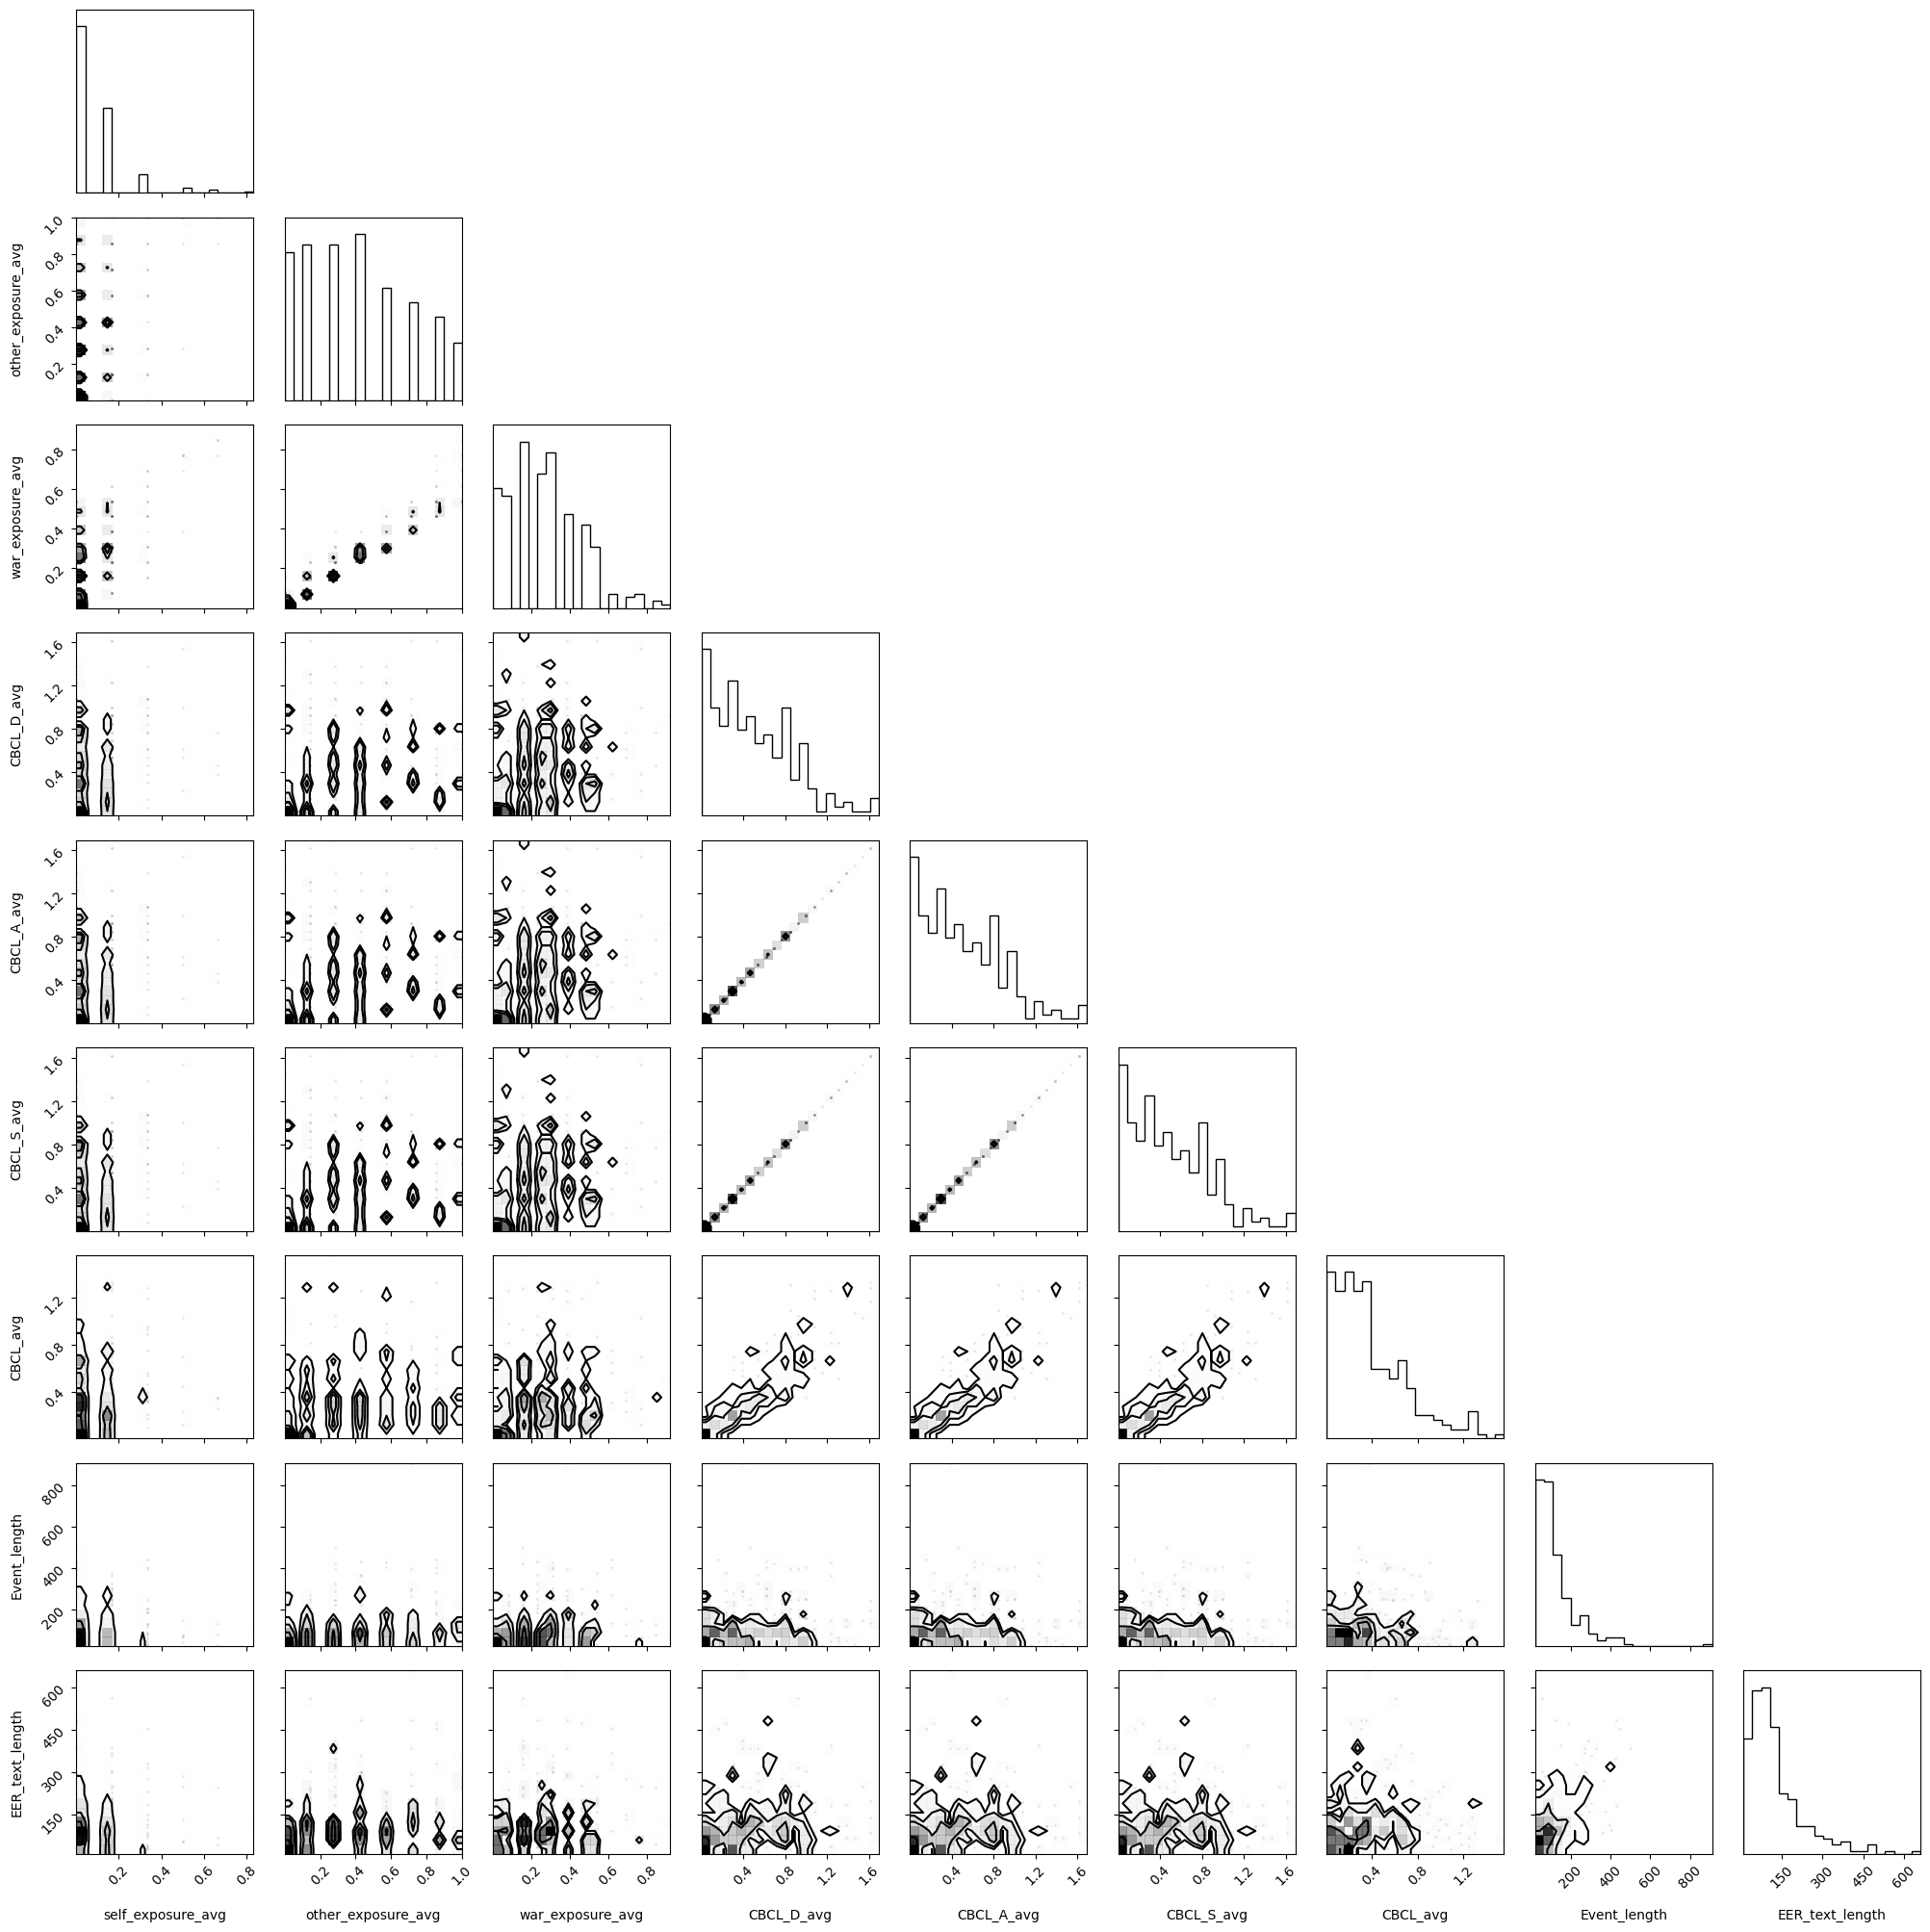

In [29]:
data[['self_exposure_avg', 'other_exposure_avg', 'war_exposure_avg','CBCL_D_avg', 'CBCL_A_avg', 'CBCL_S_avg', 'CBCL_avg', 'Event_length', 'EER_text_length']]
# Generate corner plot using ArviZ
labels = data[['self_exposure_avg', 'other_exposure_avg', 'war_exposure_avg','CBCL_D_avg', 'CBCL_A_avg', 'CBCL_S_avg', 'CBCL_avg', 'Event_length', 'EER_text_length']].columns.tolist()  # Get column names as labels
figure = corner.corner(data[['self_exposure_avg', 'other_exposure_avg', 'war_exposure_avg','CBCL_D_avg', 'CBCL_A_avg', 'CBCL_S_avg', 'CBCL_avg', 'Event_length', 'EER_text_length']].values, labels=labels, quiet = True)
plt.tight_layout()
plt.show()

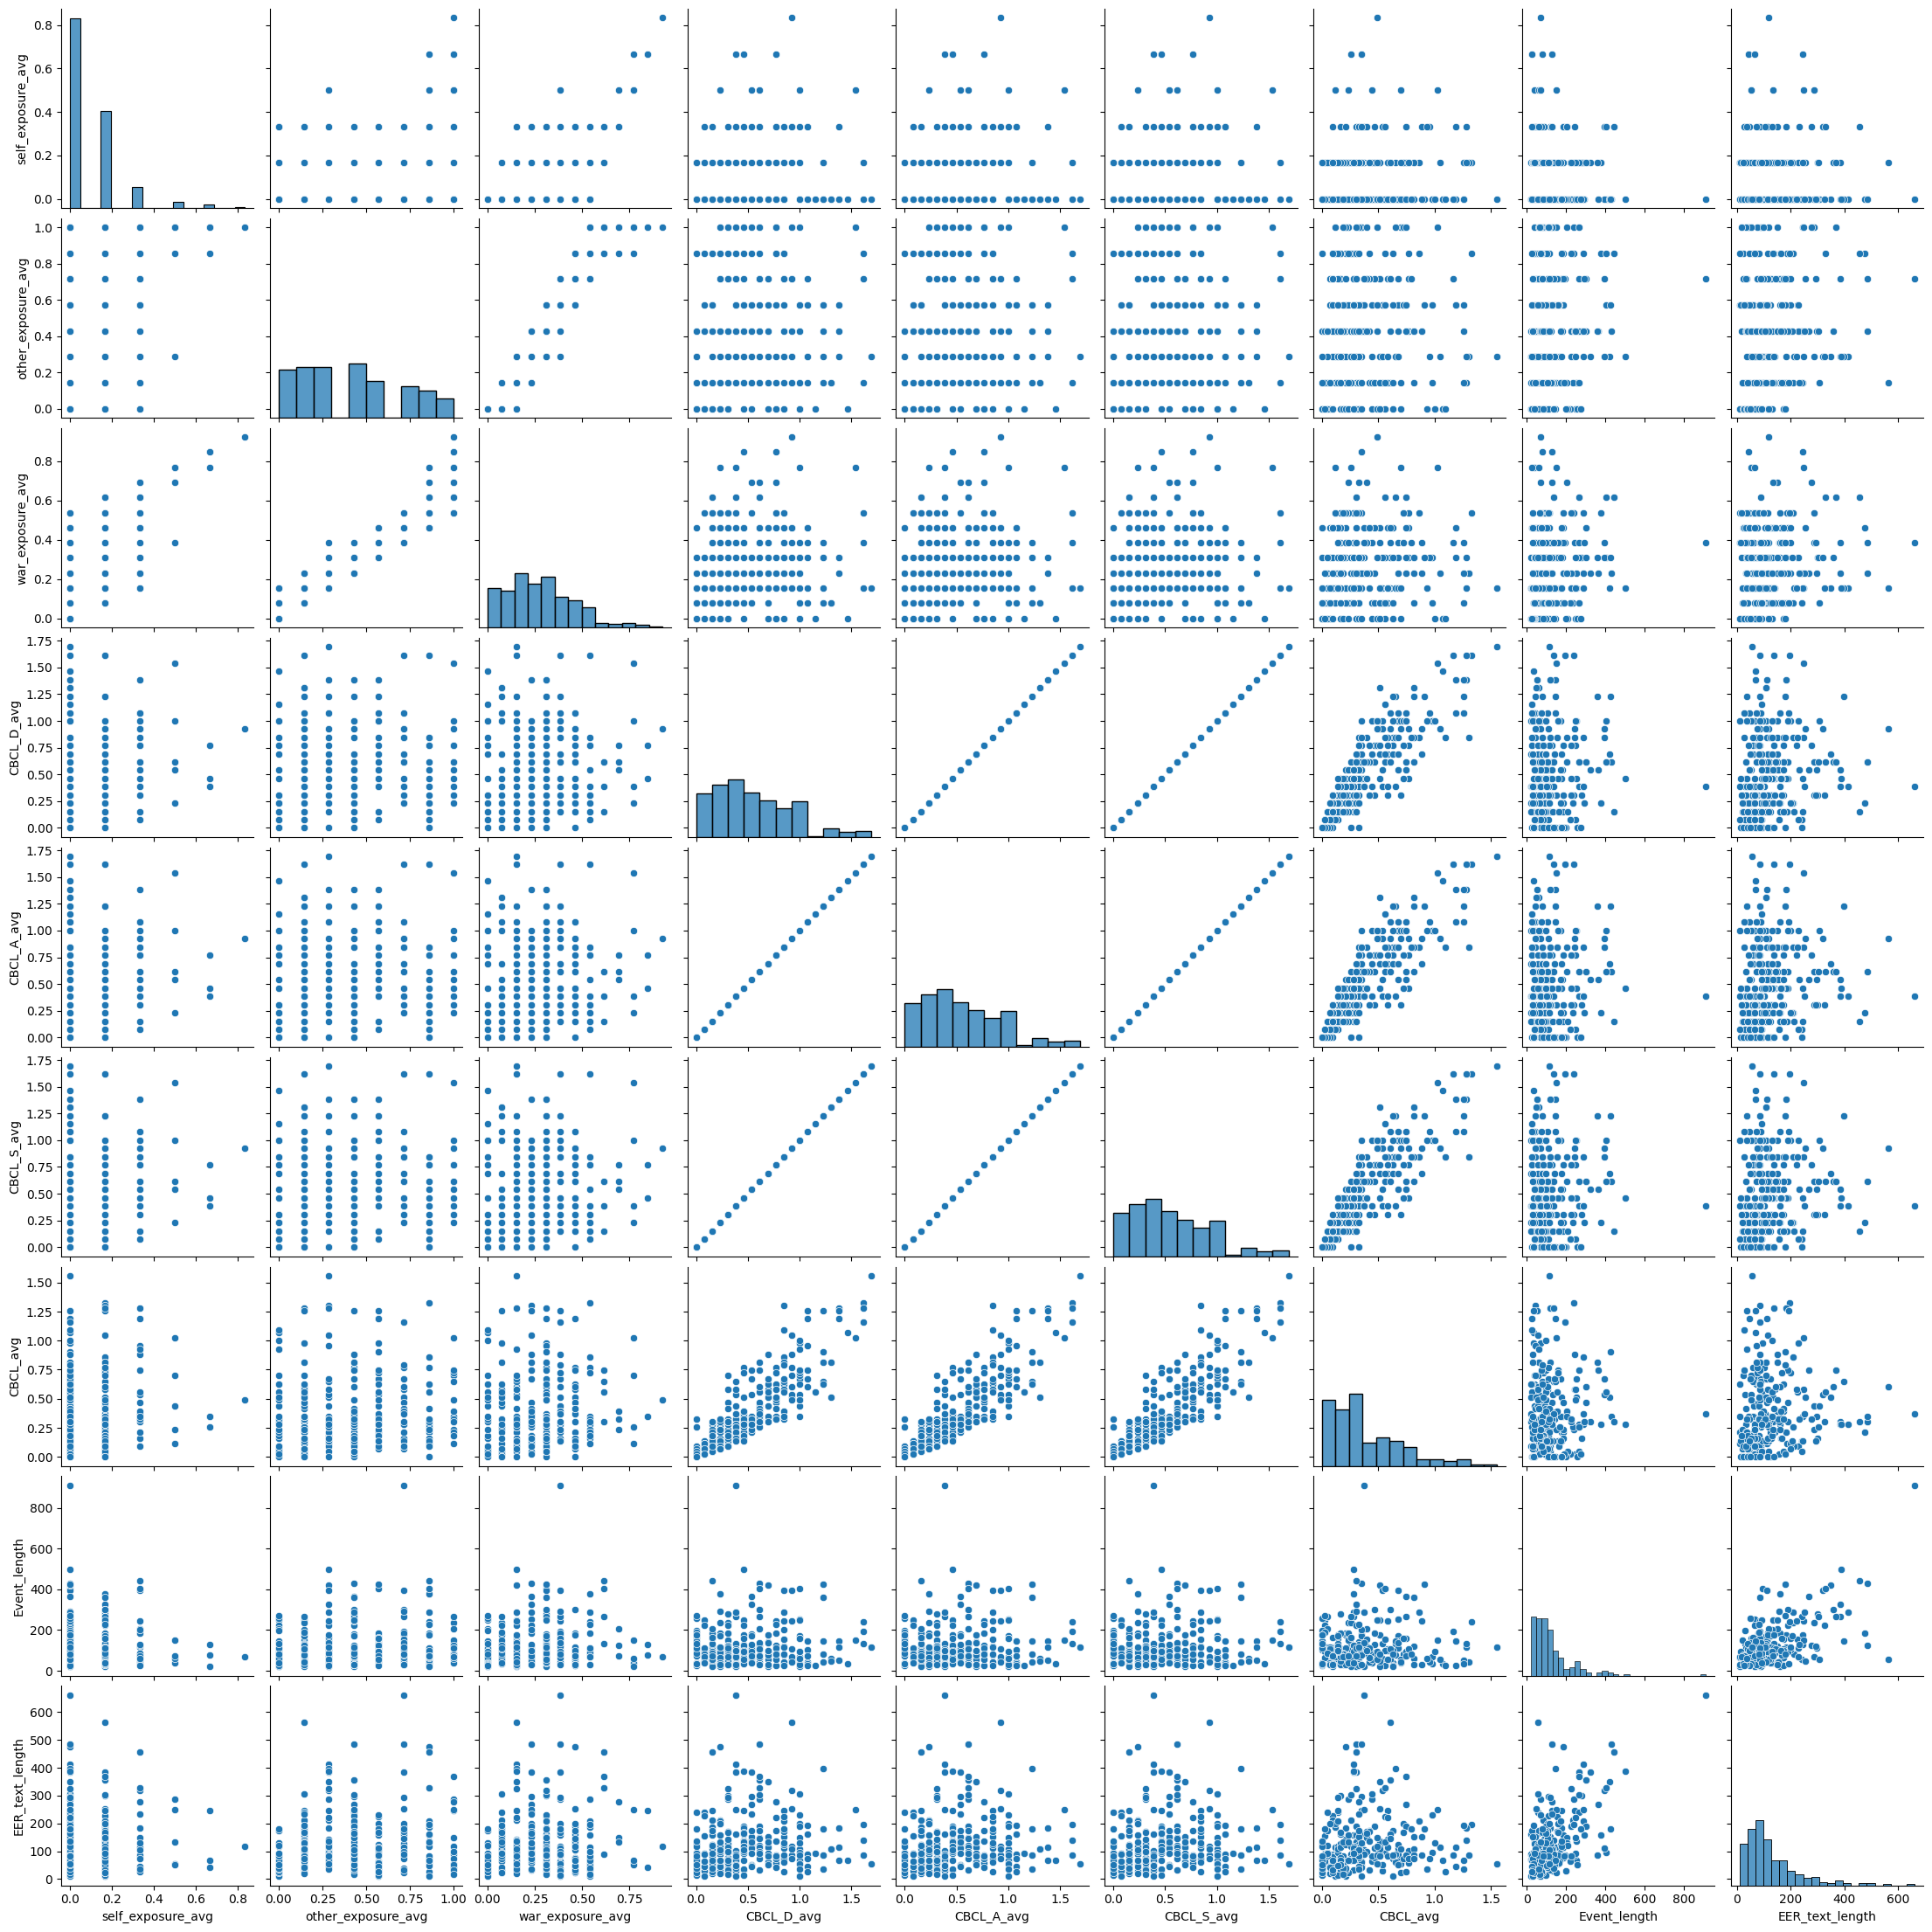

In [28]:
sns.pairplot(data[['self_exposure_avg', 'other_exposure_avg', 'war_exposure_avg','CBCL_D_avg', 'CBCL_A_avg', 'CBCL_S_avg', 'CBCL_avg', 'Event_length', 'EER_text_length']])